In [ ]:
import matplotlib.pyplot as plt
from torchvision import datasets, transforms
import torchvision
import torch
import torch.nn as nn
import torch.optim as optim
from torch.utils.data import DataLoader, random_split, Dataset
import torch.nn.functional as F
from sklearn.metrics import confusion_matrix
import seaborn as sn
import pandas as pd
import numpy as np
from torchsummary import summary
from tqdm import tqdm
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
import time
from tqdm.autonotebook import tqdm, trange
from torch.autograd import Variable

# Вариант 3

Построить модель линейной регрессии на имеющихся данных

In [ ]:
import matplotlib.pyplot as plt

df_x = pd.read_csv('x.csv', index_col=0)
df_y = pd.read_csv('y.csv', index_col=0)

df_x.head()

,0
0,1.462108
1,1.133769
2,-2.301539
3,1.744812
4,0.042214


In [ ]:
df_y.head()

,0
0,101.159902
1,78.442913
2,-159.238195
3,120.719533
4,2.920673


In [ ]:
df_x = df_x.rename({'0': "0_x"}, axis=1)
df_y = df_y.rename({'0': "0_y"}, axis=1)

df_res = pd.merge(df_x, df_y, left_index=True, right_index=True) # , on=0)
df_res.head()

,0_x,0_y
0,1.462108,101.159902
1,1.133769,78.442913
2,-2.301539,-159.238195
3,1.744812,120.719533
4,0.042214,2.920673


Зашумим входные данные

In [ ]:
noise = np.random.randint(-100, 340, size=20) / 10
df_res['0_y'] = df_res['0_y'] + noise

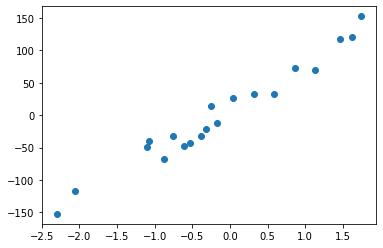

In [ ]:
plt.figure()
plt.scatter(df_res['0_x'], df_res['0_y'])
plt.show()

In [ ]:
class LinReg(nn.Module):
  def __init__(self, input_size):
    super(LinReg, self).__init__()
    self.fc1 = nn.Linear(input_size, 3)
    self.relu = nn.ReLU()
    self.fc2 = nn.Linear(3, 1)
  

  def forward(self, x):
    return self.fc2(self.relu(self.fc1(x)))

In [ ]:
x = df_res["0_x"]
y = df_res["0_y"]
x_train, x_test, y_train, y_test = train_test_split(np.array(x), np.array(y), test_size=0.2, random_state=1)

In [ ]:
x_train = torch.from_numpy(x_train.reshape(-1, 1)).float()
y_train = torch.from_numpy(y_train.reshape(-1, 1)).float()

In [ ]:
input_size = 1
model = LinReg(input_size)
optimizer = torch.optim.Adam(model.parameters(), lr=0.1)
criterion = torch.nn.MSELoss(reduction='sum')

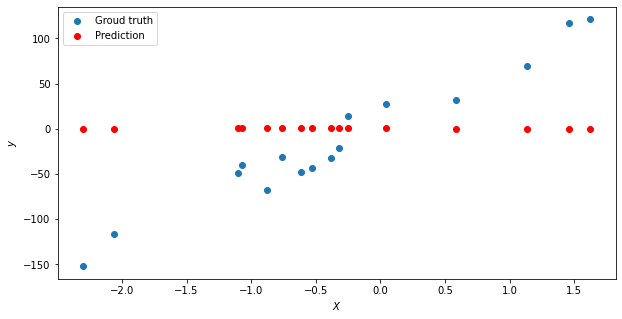

In [ ]:
def predict(net, X, y):
    y_pred = net.forward(X)

    plt.figure(figsize=(10, 5))
    plt.plot(X.numpy(), y.numpy(), 'o', label='Groud truth')
    plt.plot(X.numpy(), y_pred.data.numpy(), 'o', c='r', label='Prediction');
    plt.legend(loc='upper left')
    plt.xlabel('$X$')
    plt.ylabel('$y$')
    return y_pred

y_pred = predict(model, x_train, y_train)

Epoch  0  loss  tensor(88143.0938, grad_fn=<MseLossBackward0>)
Epoch  100  loss  tensor(4802.6509, grad_fn=<MseLossBackward0>)
Epoch  200  loss  tensor(3263.0317, grad_fn=<MseLossBackward0>)
Epoch  300  loss  tensor(3230.9333, grad_fn=<MseLossBackward0>)
Epoch  400  loss  tensor(3200.5361, grad_fn=<MseLossBackward0>)
Epoch  500  loss  tensor(3172.0464, grad_fn=<MseLossBackward0>)
Epoch  600  loss  tensor(3146.8503, grad_fn=<MseLossBackward0>)
Epoch  700  loss  tensor(3125.8428, grad_fn=<MseLossBackward0>)
Epoch  800  loss  tensor(3108.7471, grad_fn=<MseLossBackward0>)
Epoch  900  loss  tensor(3095.4729, grad_fn=<MseLossBackward0>)
Epoch  1000  loss  tensor(3085.6899, grad_fn=<MseLossBackward0>)
Epoch  1100  loss  tensor(3078.8767, grad_fn=<MseLossBackward0>)
Epoch  1200  loss  tensor(3074.0781, grad_fn=<MseLossBackward0>)
Epoch  1300  loss  tensor(3072.8821, grad_fn=<MseLossBackward0>)
Epoch  1400  loss  tensor(3073.2874, grad_fn=<MseLossBackward0>)
Epoch  1500  loss  tensor(3072.8564,

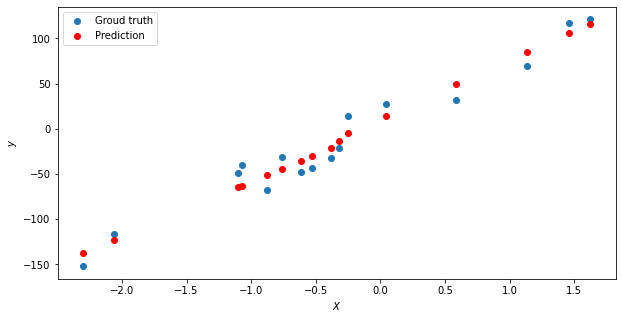

In [ ]:
for epoch_index in range(2000):
    optimizer.zero_grad()

    y_pred = model.forward(x_train)
    loss_val = criterion.forward(y_pred, y_train)

    loss_val.backward()

    optimizer.step()
    if epoch_index % 100 == 0:
      print("Epoch ", epoch_index, " loss ", loss_val)

y_pred_train = predict(model, x_train, y_train)

In [ ]:
def test_predict(net, X, y):
    with torch.no_grad():
      y_pred = net.forward(X)

    plt.figure(figsize=(10, 5))
    plt.plot(X.numpy(), y.numpy(), 'o', label='Groud truth')
    plt.plot(X.numpy(), y_pred.data.numpy(), 'o', c='r', label='Prediction');
    plt.legend(loc='upper left')
    plt.xlabel('$X$')
    plt.ylabel('$y$')

    return y_pred

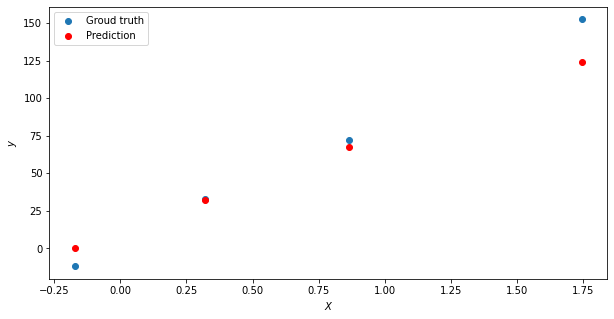

In [ ]:
x_test = torch.from_numpy(x_test.reshape(-1, 1)).float()
y_test = torch.from_numpy(y_test.reshape(-1, 1)).float()
y_pred_test = test_predict(model, x_test, y_test)

# Отчетность

В первую очередь в работе должна быть продемонстрирована ваша архитектура и процесс обучения (с кратким обоснованием выбора гиперпараметров).

Выбрали самую обычную модель из двух линейных слоёв и активации ReLU, так как это очень простая линейная регрессия и данных очень мало. Процесс обучения видно выше по значению лосса и графикам. Гиперпараметры: кол-во скрытых нейронов - 3 и lr = 0.1, так как иначе начинается переобучение. Как оптимизатор Adam - чтобы не использовать совсем банальную SGD.

По задаче регрессии:



1.   Вывести коэффициент детерминации и средний квадрат ошибки
2.   Продемнострировать, что выбрано оптимальное соотношение train/test, путем перебора всех содержательных вариантов.



In [ ]:
from sklearn.metrics import r2_score
print("Train R2 ",r2_score(y_train.detach().numpy(), y_pred_train.detach().numpy()))
print("Train R2 ",r2_score(y_test.detach().numpy(), y_pred_test.detach().numpy()))

Train R2  0.9634392569299548
Train R2  0.9313647511382911


In [ ]:
print("Train MSE ",criterion(y_train, y_pred_train))
print("Train MSE ",criterion(y_test, y_pred_test))

Train MSE  tensor(3073.5112, grad_fn=<MseLossBackward0>)
Train MSE  tensor(1002.3640)


Соотношение train/test 0.8 и 0.2. Так как данных очень мало, с 0.9 и 0.1 или 0.7 и 0.3 будет либо мало данных для теста либо мало данных для трейна.